<a href="https://colab.research.google.com/github/nataliebakken/PortfolioProjects/blob/main/2021_United_Health_Group_Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UnitedHealth Group Stock Analysis

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    'figure.figsize': (11, 5),
    'axes.titlesize': 16,
    'axes.labelsize': 12})

# --- Load Data ---
import kagglehub
import pandas as pd

# Download the actual dataset
path = kagglehub.dataset_download("kalilurrahman/united-healthcare-stock-data")

print("Path to dataset files:", path)

# Load the CSV file
df = pd.read_csv(f"{path}/UnitedHealthCare_stock_history.csv", parse_dates=['Date'], index_col='Date')

print(df.head())



100%|██████████| 318k/318k [00:00<00:00, 68.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kalilurrahman/united-healthcare-stock-data/versions/187
            Open      High       Low     Close   Volume  Dividends  \
Date                                                                 
1984-10-17   0.0  0.122685  0.119455  0.119455  9868800        0.0   
1984-10-18   0.0  0.129141  0.122685  0.122685  5324800        0.0   
1984-10-19   0.0  0.122685  0.119455  0.119455  3043200        0.0   
1984-10-22   0.0  0.122685  0.119455  0.119455  2326400        0.0   
1984-10-23   0.0  0.119456  0.116227  0.116227   787200        0.0   

            Stock Splits  
Date                      
1984-10-17           0.0  
1984-10-18           0.0  
1984-10-19           0.0  
1984-10-22           0.0  
1984-10-23           0.0  


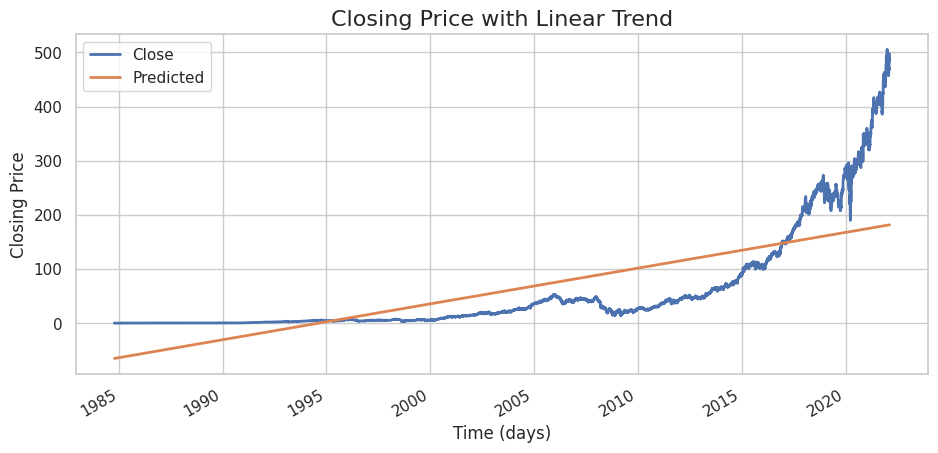

In [15]:
# --- Linear Trend Modeling ---
# Create a numeric time column
df['Time'] = np.arange(len(df))

# Features and target
X = df[['Time']]
y = df['Close']

# Fit linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)

# Predicted values
df['Predicted'] = model.predict(X)

# Plot
df[['Close', 'Predicted']].plot(title='Closing Price with Linear Trend', lw=2)
plt.xlabel("Time (days)")
plt.ylabel("Closing Price")
plt.show()

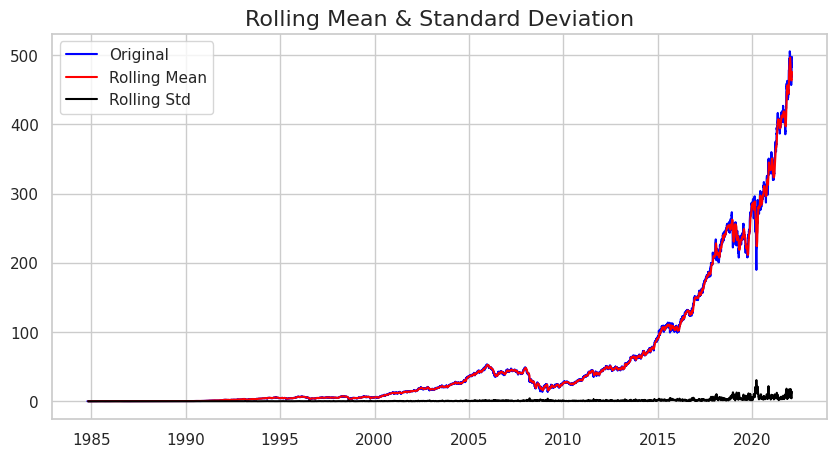

Dickey-Fuller Test Results:
ADF Statistic: 7.0508
p-value: 1.0000


In [17]:
# --- Stationarity Test ---
def test_stationarity(series):
    rolmean, rolstd = series.rolling(12).mean(), series.rolling(12).std()
    plt.figure(figsize=(10,5))
    plt.plot(series, label='Original', color='blue')
    plt.plot(rolmean, label='Rolling Mean', color='red')
    plt.plot(rolstd, label='Rolling Std', color='black')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    print("Dickey-Fuller Test Results:")
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")

test_stationarity(df['Close'])

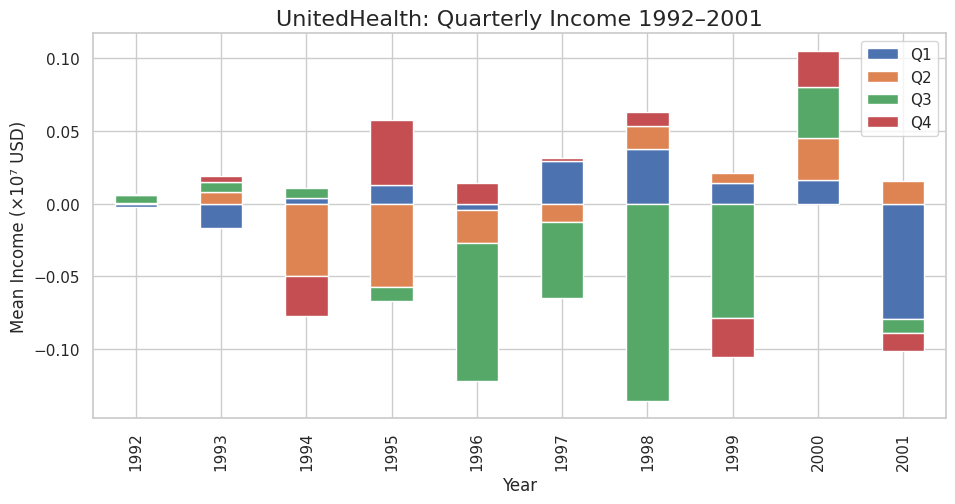

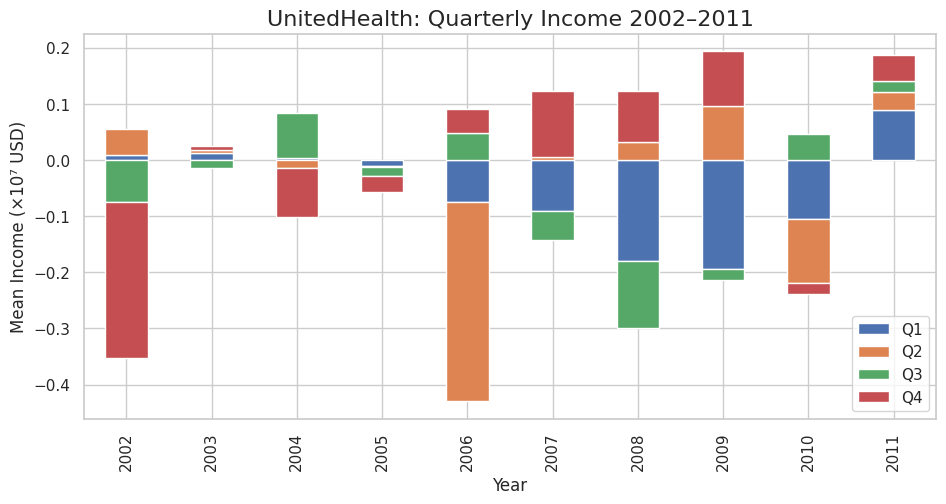

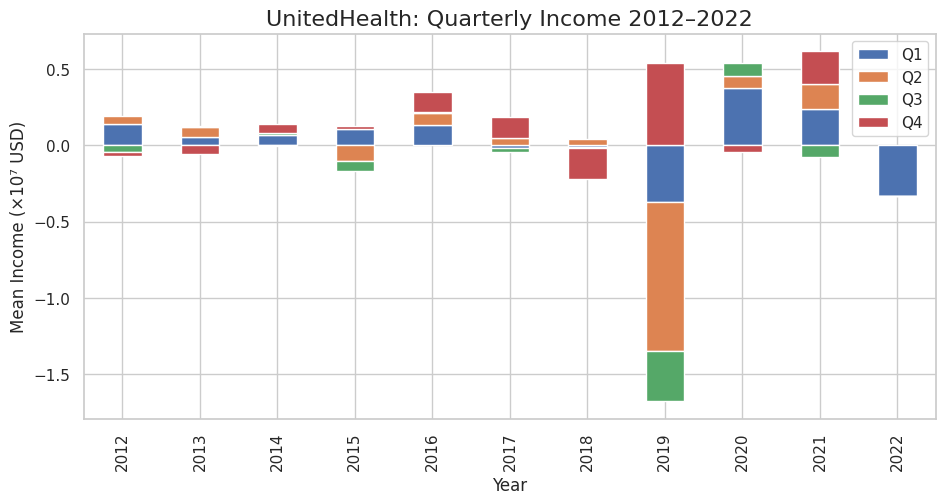

In [19]:
# --- Net Worth by Quarter ---
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Net_Worth'] = df['Volume'] * (df['Close'] - df['Open'])

quarters = {
    'Q1': (1, 3),
    'Q2': (4, 6),
    'Q3': (7, 9),
    'Q4': (10, 12)
}

def quarterly_income_plot(start, end, label):
    yearly_means = {}
    for q_name, (start_m, end_m) in quarters.items():
        mask = (df['Month'] >= start_m) & (df['Month'] <= end_m) & (df['Year'].between(start, end))
        yearly_means[q_name] = df[mask].groupby('Year')['Net_Worth'].mean() / 1e7
    pd.DataFrame(yearly_means).plot(kind='bar', stacked=True, title=label)
    plt.ylabel('Mean Income (×10⁷ USD)')
    plt.show()

quarterly_income_plot(1992, 2001, 'UnitedHealth: Quarterly Income 1992–2001')
quarterly_income_plot(2002, 2011, 'UnitedHealth: Quarterly Income 2002–2011')
quarterly_income_plot(2012, 2022, 'UnitedHealth: Quarterly Income 2012–2022')

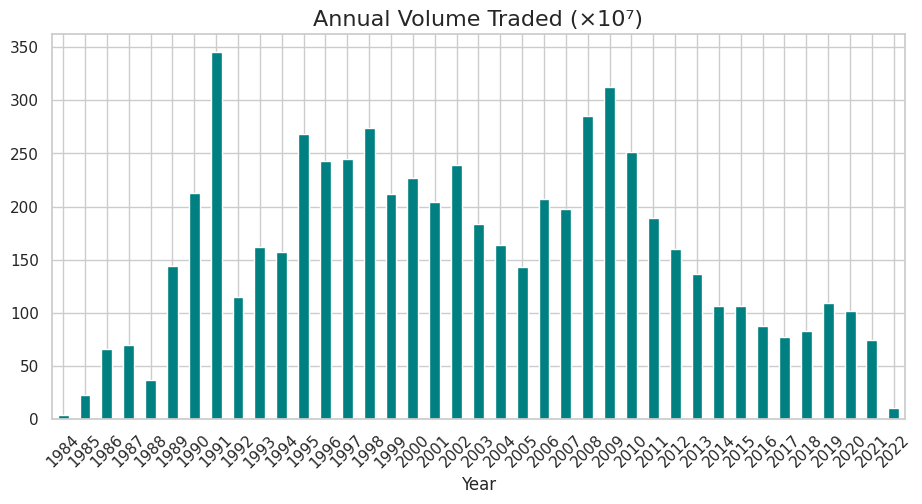

In [20]:
# --- Volume Traded Over Time ---
vol_by_year = df.groupby('Year')['Volume'].sum() / 1e7
vol_by_year.plot(kind='bar', color='teal', title='Annual Volume Traded (×10⁷)', rot=45)
plt.show()